# HRP Portfolio Optimization

In [99]:
%load_ext autoreload
%autoreload 2
# imports
from src.utils.DataProvider import DataProvider


import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import datetime

# Fetch data
tickers = [
    "^FTSE",
    "SPY",
    "GOLD",
    "^GDAXI",
    "^RUT",
    "AAPL",
    "BAC",
    "NVDA",
    "MSTR",
    "BA",
    "FLUT",
    "TSM",
    "JPM",
    "^N225"
]
start = datetime.datetime(2003, 1, 1)
end = datetime.datetime(2023, 12, 31)

data_provider = DataProvider(start, end, tickers)
data = data_provider.provide()
data.head()


[*********************100%***********************]  14 of 14 completed
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/utils/DataProvider.py:63: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data = self.data.pct_change()


Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-03,0.006754,0.008855,-0.006226,0.0,0.010842,0.019655,-0.027690,0.000000,0.003075,0.023351,-0.001122,-0.003897,0.000000,-0.005782
2003-01-06,0.000000,-0.001463,0.014380,0.0,-0.010095,0.078643,0.093851,0.081242,0.017625,0.026846,-0.000899,0.020793,0.000000,0.017140
2003-01-07,-0.003353,-0.024319,0.001544,0.0,-0.019758,-0.005003,0.044379,-0.003011,-0.002475,0.003922,-0.010996,-0.014088,-0.006522,-0.007683
2003-01-08,-0.020206,0.006006,-0.004064,0.0,0.016255,-0.038434,-0.045326,-0.099473,-0.014451,-0.042969,-0.008238,-0.038477,-0.016023,-0.012387
2003-01-09,0.008937,0.011940,0.013086,0.0,-0.014076,0.019798,0.026706,0.017573,0.015538,0.054422,0.002344,0.014928,-0.002333,0.017657


<Axes: title={'center': 'Data Overview'}, xlabel='Date', ylabel='Price'>

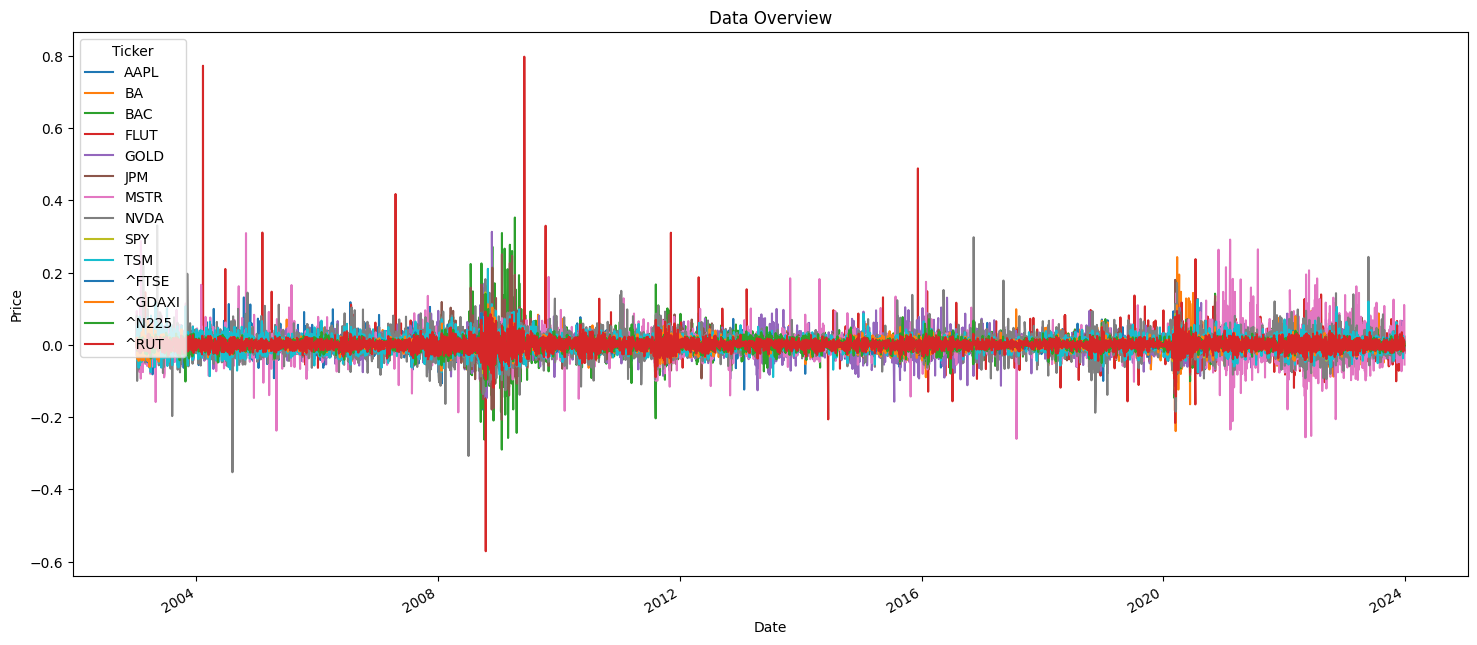

In [92]:
data.plot(figsize=(18, 8), ylabel="Price", title="Data Overview")

In [42]:
data.shape

(5463, 14)

In [8]:
# Transformation
X = data.copy("deep")
rows = len(X)
training_rows = int(rows * 0.8) # amount of training rows (80%)
training_rows


3882

In [57]:
X_train = X.head(training_rows)
X_test = X.tail(rows - training_rows)

# calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test = X_test.pct_change().dropna()

In [67]:
def correlation_distance(corr):
    dist = ((1 - corr) / 2.0) ** 0.5
    return dist

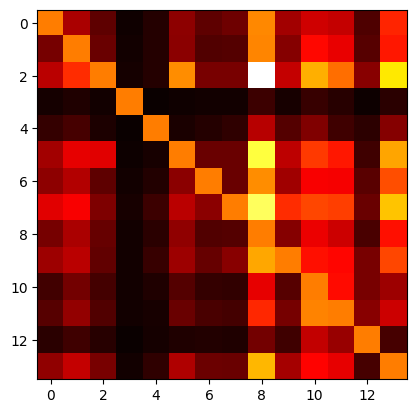

In [74]:
sigmas = returns.cov()

D = 1 / np.sqrt(np.diag(sigmas)) # takes the inverse of sqrt of diag.
corr =  D * sigmas * D
# corr = returns.corr()

plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()
# returns.corr()


In [63]:
# Calculate linkage
dist = correlaiton_distance(returns.corr())
link = linkage(dist, "ward") # TODO: investigate what this does
link[0]

/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_79448/861281921.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, "ward") # TODO: investigate what this does


array([ 8.        , 13.        ,  0.33174373,  2.        ])

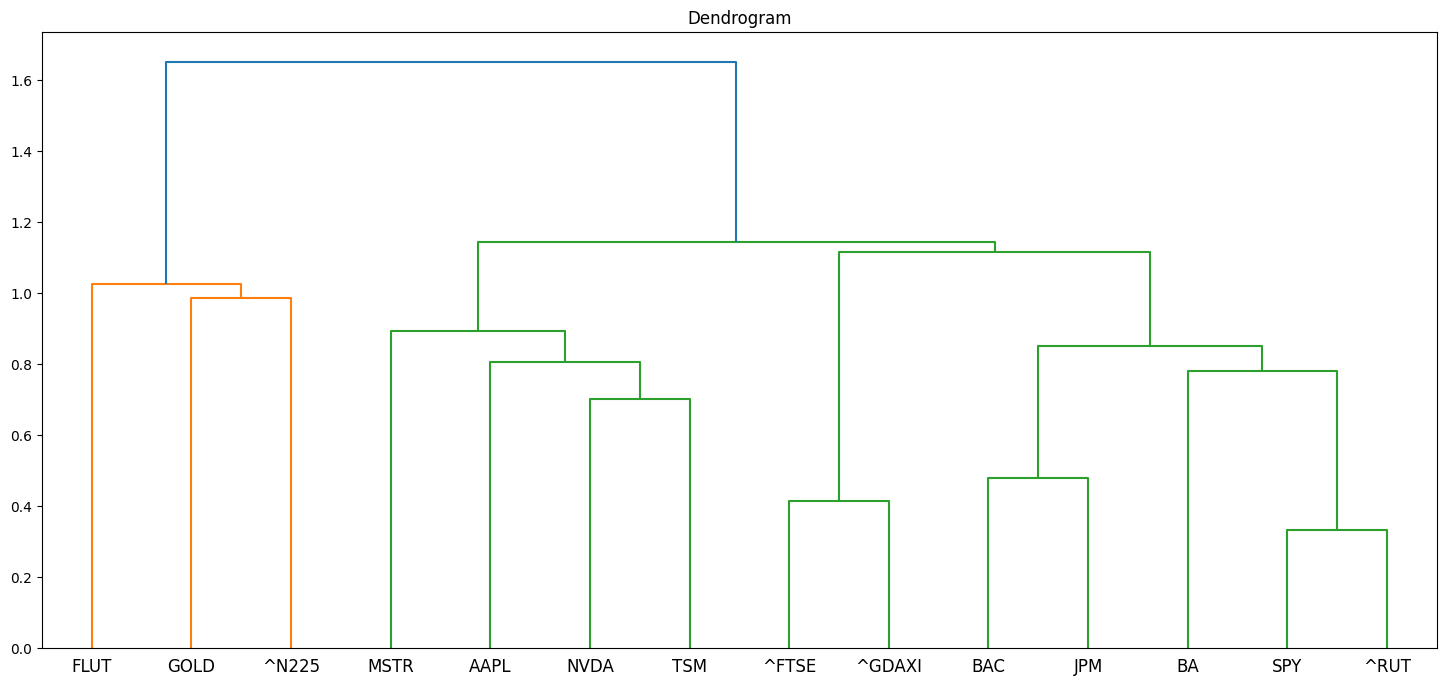

In [64]:
# Plot dendogram
plt.figure(figsize=(18, 8))
plt.title("Dendrogram")
dendrogram(link, labels = X.columns)
plt.show()

In [92]:
hrp = HRP()
hrp.getQuasiDiag(link)
# link[-1,1]


[3, 4, 12, 6, 0, 7, 9, 10, 11, 2, 5, 1, 8, 13]

In [9]:
import sys
import os
sys.path.append(os.path.abspath('/Users/Francesco/HRP-Portfolio-Optimization/src'))
print(sys.path)

['/Users/Francesco/anaconda3/lib/python311.zip', '/Users/Francesco/anaconda3/lib/python3.11', '/Users/Francesco/anaconda3/lib/python3.11/lib-dynload', '', '/Users/Francesco/HRP-Portfolio-Optimization/venv/lib/python3.11/site-packages', '/Users/Francesco/HRP-Portfolio-Optimization/src']


In [8]:
data

Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-07 00:00:00+00:00,-0.003352,-0.024319,0.001544,0.000000,-0.019758,-0.005003,0.044379,-0.003011,-0.002474,0.003921,-0.010996,-0.014088,-0.006522,-0.007683
2003-01-08 00:00:00+00:00,-0.020205,0.006006,-0.004064,0.000000,0.016255,-0.038434,-0.045326,-0.099473,-0.014451,-0.042969,-0.008238,-0.038477,-0.016023,-0.012387
2003-01-09 00:00:00+00:00,0.008937,0.011940,0.013085,0.000000,-0.014076,0.019798,0.026706,0.017573,0.015538,0.054422,0.002344,0.014928,-0.002333,0.017657
2003-01-10 00:00:00+00:00,0.002724,-0.001475,-0.002778,0.000000,0.016224,-0.007692,-0.016763,0.017270,0.002694,0.032258,0.010193,-0.000115,-0.003234,0.001263
2003-01-14 00:00:00+00:00,-0.007472,0.008863,0.009471,0.000000,-0.041507,0.018457,0.067607,-0.000805,0.002901,0.033750,-0.007171,0.020212,0.009753,0.005070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,-0.000770,0.006801,0.006671,-0.002152,0.011255,0.005704,0.014787,0.018270,0.009482,0.025090,-0.002722,-0.002727,-0.015901,0.017258
2023-12-22 00:00:00+00:00,-0.005547,-0.006030,0.006928,-0.006788,0.010573,-0.000597,0.064078,-0.003266,0.002010,0.005851,0.000364,0.001124,0.000862,0.008378
2023-12-27 00:00:00+00:00,-0.002325,0.006374,0.012264,0.008240,0.017071,0.011948,0.083118,0.012021,0.006038,0.014542,0.003573,0.002148,0.015442,0.015856


In [40]:
from src.models.HRP_calculator import HRP_Calculator
import sklearn

# Assuming 'data' is defined or loaded earlier in your code
idk = HRP_Calculator(data)
weights = idk.weights_allocate()
weights

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  eucledian_df = self.stats_module.calc_eucledian_distance()
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  eucledian_df = self.stats_module.calc_eucledian_distance()
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  eucledian_df = self.stats_module.calc_eucledian_distance()
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observa

{'SPY': 0.005949058217211126,
 '^RUT': 0.0031347753953755424,
 '^FTSE': 0.00021183993953826226,
 '^GDAXI': 0.7046314420320079,
 'BAC': 0.024793668555569096,
 'JPM': 5.161880863247751e-05,
 'NVDA': 0.13942969870647956,
 'TSM': 0.00046459453149316293,
 'AAPL': 8.940018921367494e-05,
 'BA': 0.0004522430386792999,
 'MSTR': 0.006530783394691788,
 'GOLD': 0.011196739703272184,
 '^N225': 0.10301137368229372,
 'FLUT': 5.276380554221313e-05}

Testing whether the HRP class actually works

In [8]:
#%pip install -U pypfopt

from pypfopt import HRPOpt

In [37]:
HRPOpt(data)._get_cluster_var(data.cov(), data.columns)

0.00011236981709777981

In [35]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage


cov_matrix = data.cov()
distance_matrix = pdist(cov_matrix, 'euclidean')
link = linkage(distance_matrix, "single")

# Initialize HRPOpt with data
hrp_opt = HRPOpt(data)
quasi_diag = hrp_opt._get_quasi_diag(link)
ordered_tickers = cov_matrix.columns[quasi_diag] 
weights = hrp_opt._raw_hrp_allocation(cov_matrix, ordered_tickers)
weights

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/venv/lib/python3.11/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.34995545 0.34995545 0.34995545 0.34995545 0.34995545 0.34995545
 0.34995545]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


Ticker
MSTR      0.035106
FLUT      0.050963
NVDA      0.037975
GOLD      0.046292
AAPL      0.071085
TSM       0.054998
BA        0.053536
^N225     0.174398
^FTSE     0.150990
^GDAXI    0.102763
SPY       0.107393
^RUT      0.064544
BAC       0.019281
JPM       0.030675
dtype: float64

In [31]:
print(cov_matrix.columns[quasi_diag])

Index(['MSTR', 'FLUT', 'NVDA', 'GOLD', 'AAPL', 'TSM', 'BA', '^N225', '^FTSE',
       '^GDAXI', 'SPY', '^RUT', 'BAC', 'JPM'],
      dtype='object', name='Ticker')


In [94]:
from src.models.HRP_new import HRPOptimizer

# Tickers in order by distance  (quasi-diagonal)
ordered_tickers = cov_matrix.columns[quasi_diag] 

my_weights = HRPOptimizer(data.cov()).quasi_diagonalization(cov_matrix=data.cov())
my_weights

[[1.00000000e+01 1.10000000e+01 1.14576360e-04 2.00000000e+00]
 [8.00000000e+00 1.30000000e+01 1.45775028e-04 2.00000000e+00]
 [1.40000000e+01 1.50000000e+01 1.83361040e-04 4.00000000e+00]
 [1.20000000e+01 1.60000000e+01 2.45155192e-04 5.00000000e+00]
 [1.00000000e+00 1.70000000e+01 2.60624416e-04 6.00000000e+00]
 [9.00000000e+00 1.80000000e+01 2.81750496e-04 7.00000000e+00]
 [0.00000000e+00 1.90000000e+01 2.83553973e-04 8.00000000e+00]
 [2.00000000e+00 5.00000000e+00 2.87827990e-04 2.00000000e+00]
 [2.00000000e+01 2.10000000e+01 3.62502126e-04 1.00000000e+01]
 [4.00000000e+00 2.20000000e+01 6.36999966e-04 1.10000000e+01]
 [7.00000000e+00 2.30000000e+01 6.43046217e-04 1.20000000e+01]
 [3.00000000e+00 2.40000000e+01 7.24869582e-04 1.30000000e+01]
 [6.00000000e+00 2.50000000e+01 8.91166786e-04 1.40000000e+01]]


[6, 3, 7, 4, 0, 9, 1, 12, 10, 11, 8, 13, 2, 5]

In [145]:
import random

In [148]:
tickers = [
    "NVDA", "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "TSLA", "AVGO",
    "WMT", "JPM", "LLY", "V", "UNH", "XOM", "MA", "COST", "HD", "PG",
    "NFLX", "JNJ", "CRM", "BAC", "ABBV", "CVX", "TMUS", "KO", "MRK", "WFC",
    "BX", "CSCO", "ADBE", "ACN", "AMD", "PEP", "NOW", "MS", "LIN", "AXP",
    "DIS", "IBM", "TXN", "PFE", "TMO", "C", "INTU", "PM", "BMY", "GS",
    "QCOM", "BKNG", "DHR", "CMCSA", "T", "RTX", "BLK", "SPGI", "AMGN", "UNP",
    "HON", "MDT", "CAT", "COP", "SLB", "GE", "SBUX", "CHTR", "MDLZ", "CL",
    "GM", "F", "MMM", "TGT", "LMT", "NOC", "RTX", "BA", "DAL", "LUV",
    "AAL", "UAL", "MAR", "HLT", "MCD", "YUM", "CMG", "DPZ", "DRI", "BBY",
    "LOW", "TJX", "ROST", "DG", "DLTR", "AZO", "ORLY", "AAP", "KMX", "TSLA"
]
tickers_10 = random.sample(tickers, 10)

In [149]:
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 12, 3)

data_provider = DataProvider(start, end, tickers_10)
data = data_provider.provide()
data.head()


[*********************100%***********************]  10 of 10 completed

The dataset contains no null values


Ticker,BAC,BBY,BKNG,CAT,DHR,DLTR,GM,LUV,MS,TXN
Date,,,,,,,,,,
2024-01-03,-0.010915,-0.023686,-0.020482,-0.028732,-0.016951,-0.040831,-0.021637,-0.041081,-0.021193,-0.014888
2024-01-04,0.008053,-0.001723,0.003130,0.006331,0.007842,-0.003950,0.006238,0.022702,0.002611,-0.013614
2024-01-05,0.018639,0.007039,-0.003450,0.009892,-0.010016,0.000808,0.014089,0.043681,0.011828,0.003830
2024-01-08,-0.007842,-0.003824,0.016050,0.011491,0.019845,0.009392,0.019728,-0.001029,0.002896,0.020836
2024-01-09,-0.015515,-0.005030,0.007621,0.000137,-0.016989,0.003416,-0.004360,0.006868,-0.015507,0.000534


In [150]:
# Create covariance matrix
covariance_matrix = data.cov()
covariance_matrix

Ticker,BAC,BBY,BKNG,CAT,DHR,DLTR,GM,LUV,MS,TXN
Ticker,,,,,,,,,,
BAC,0.000211,0.000066,0.000062,0.000122,0.000048,0.000019,0.000119,0.000114,0.000161,0.000083
BBY,0.000066,0.000437,0.000041,0.000074,0.000046,0.000046,0.000137,0.000110,0.000054,0.000072
BKNG,0.000062,0.000041,0.000278,0.000099,0.000055,0.000038,0.000069,0.000074,0.000077,0.000086
CAT,0.000122,0.000074,0.000099,0.000279,0.000069,0.000042,0.000114,0.000128,0.000152,0.000140
DHR,0.000048,0.000046,0.000055,0.000069,0.000199,0.000034,0.000050,0.000079,0.000054,0.000053
DLTR,0.000019,0.000046,0.000038,0.000042,0.000034,0.000698,0.000087,0.000044,-0.000018,0.000019
GM,0.000119,0.000137,0.000069,0.000114,0.000050,0.000087,0.000407,0.000128,0.000129,0.000106
LUV,0.000114,0.000110,0.000074,0.000128,0.000079,0.000044,0.000128,0.000560,0.000112,0.000110
MS,0.000161,0.000054,0.000077,0.000152,0.000054,-0.000018,0.000129,0.000112,0.000274,0.000117


In [167]:
from src.models.RelationalStatistics import RelationalStatistics
from src.models.HRP_calculator import HRP_Calculator, HRP_Calculator_2, HRP_Calculator_3
from scipy.cluster.hierarchy import dendrogram
hrp = HRP_Calculator(data, use_shrinkage= False).hierarchical_clustering()
qdiag = HRP_Calculator(data).quasi_diagonalization()
hrp


/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Get the clusters being merged
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Get the clusters being merged


array([[ 0.        ,  8.        ,  0.81991744,  2.        ],
       [ 3.        , 10.        ,  0.98436084,  3.        ],
       [ 9.        , 11.        ,  1.0511006 ,  4.        ],
       [ 6.        , 12.        ,  1.15866479,  5.        ],
       [ 1.        , 13.        ,  1.20665211,  6.        ],
       [ 2.        , 14.        ,  1.21025838,  7.        ],
       [ 7.        , 15.        ,  1.22152038,  8.        ],
       [ 4.        , 16.        ,  1.24451256,  9.        ],
       [ 5.        , 17.        ,  1.40231968, 10.        ]])

In [173]:
qdiag[0]

array([2.10922649e-04, 1.56994376e-04, 1.18986953e-04, 8.26486549e-05,
       1.17147765e-04, 6.65693224e-05, 6.22303300e-05, 1.12782079e-04,
       4.78192721e-05, 2.19046092e-05])

([<matplotlib.axis.YTick at 0x1093742d0>,
 [Text(0, 0, 'DLTR'),
  Text(0, 1, 'BAC'),
  Text(0, 2, 'TXN'),
  Text(0, 3, 'LUV'),
  Text(0, 4, 'BKNG'),
  Text(0, 5, 'MS'),
  Text(0, 6, 'DHR'),
  Text(0, 7, 'BBY'),
  Text(0, 8, 'CAT'),
  Text(0, 9, 'GM')])

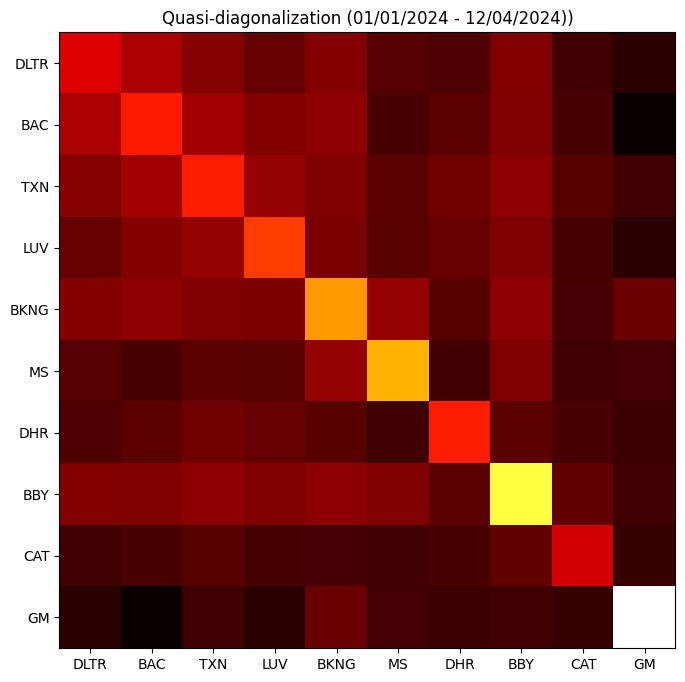

In [181]:
plt.figure(figsize=(18, 8))
plt.title("Quasi-diagonalization (01/01/2024 - 12/04/2024))")
plt.imshow(qdiag, cmap='hot', interpolation='nearest')
plt.xticks(range(0, 10), labels=tickers_10)
plt.yticks(range(0, 10), labels=tickers_10)


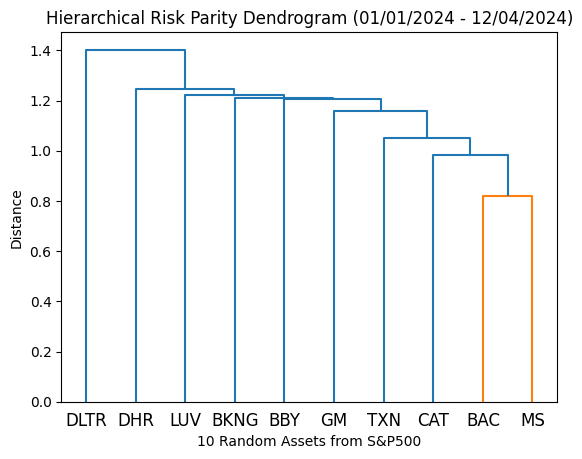

In [157]:
dendrogram(hrp, labels=data.columns)
plt.title("Hierarchical Risk Parity Dendrogram (01/01/2024 - 12/04/2024)")  # Adding a title
plt.xlabel("10 Random Assets from S&P500")  # X-axis label
plt.ylabel("Distance")  # Y-axis label
plt.show()

In [158]:
hrp_weights = HRP_Calculator(data, use_shrinkage=False).weights_allocate()
hrp_weights3 = HRP_Calculator_3(data).weights_allocate()

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Des

In [160]:
hrp_weights3

Ticker
BAC     0.077612
BBY     0.094941
BKNG    0.126503
CAT     0.097875
DHR     0.230526
DLTR    0.065612
GM      0.079795
LUV     0.062893
MS      0.059680
TXN     0.104563
dtype: float64

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Get the clusters being merged
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Get the clusters being merged
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Get the clusters being merged
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Get the cl

([<matplotlib.patches.Wedge at 0x10cc3ad10>,
 [Text(1.0819610599548757, 0.19839421549360242, ''),
  Text(0.9087739290426514, 0.6197821761654512, ''),
  Text(0.5244259212401736, 0.9669423215121962, ''),
  Text(-0.010825533724092807, 1.099946729537203, ''),
  Text(-0.645829681753544, 0.8904515832801446, ''),
  Text(-1.0740632395014968, 0.2374619075800377, ''),
  Text(-1.01438842263955, -0.4254599017708318, ''),
  Text(-0.48137765254160997, -0.9890781342409352, ''),
  Text(0.2177814338524844, -1.0782259721733456, ''),
  Text(0.9076718177392047, -0.6213951007869375, '')])

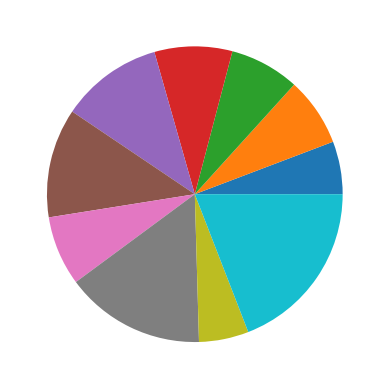

In [ ]:
hrp_weights = HRP_Calculator(data, use_shrinkage=False).weights_allocate()

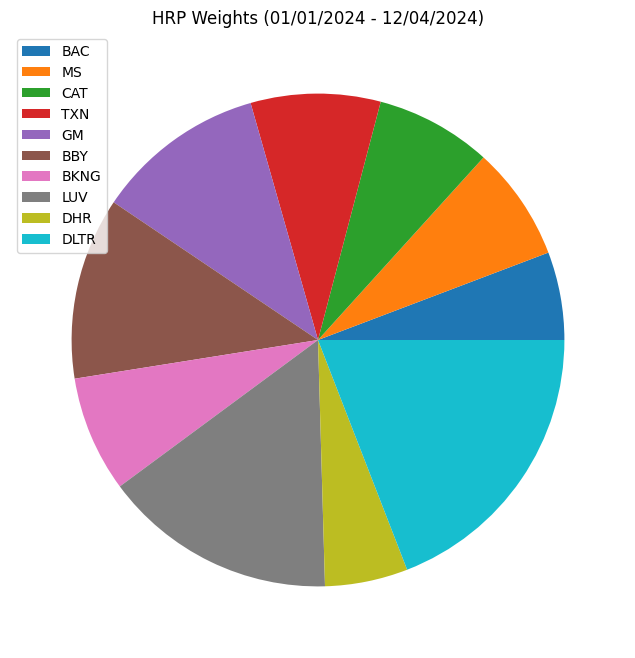

In [184]:
plt.figure(figsize=(18, 8))
plt.title("HRP Weights (01/01/2024 - 12/04/2024)")
plt.pie(hrp_weights.values())
plt.legend(hrp_weights.keys())

In [166]:
hrp_weights_true = HRP_Calculator(data, use_shrinkage=True).weights_allocate()
hrp_weights_true

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage_matrix


{'BAC': 0.05772574953877534,
 'MS': 0.07507026151352458,
 'CAT': 0.0762223733615732,
 'TXN': 0.08509588620007684,
 'GM': 0.11150894836743784,
 'BBY': 0.11949334868373751,
 'BKNG': 0.07618016347487118,
 'LUV': 0.1532294435254849,
 'DHR': 0.05438675881943389,
 'DLTR': 0.19108706651508475}